### 5. pandas 시각화

Pandas의 시리즈나 데이터프레임은 plot이라는 시각화 메서드를 내장하고 있다. plot은 matplotlib를 내부에서 임포트하여 사용한다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- Line graph

In [3]:
np.random.seed(2023)
df = pd.DataFrame(np.random.randn(100, 3), columns=list('ABC'),
                  index=pd.date_range('2023-04-01', periods=100)).cumsum()
df.head()

,A,B,C
2023-04-01,0.711674,-0.324485,-1.001871
2023-04-02,0.947924,-0.426645,-2.143163
2023-04-03,3.602332,1.013960,-2.044261
2023-04-04,0.480799,-0.062561,-2.369943
2023-04-05,-0.554698,-0.488882,-3.399304


In [ ]:
df.plot(figsize=(5,3))       # default가 line graph / figsize위치
plt.title('pandas의 plot method 사용 예')
plt.xlabel('일자'), plt.ylabel('데이터')
plt.show()

plot 메서드의 kind라는 인수를 바꾸면 여러가지 플롯을 그릴 수 있다. 다음과 같은 인수값을 지원한다.

bar

pie

hist

kde

box

scatter

area

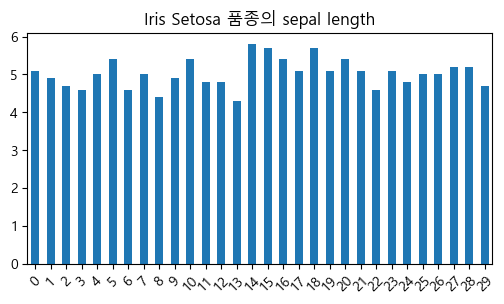

In [5]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터

iris.sepal_length[:30].plot(kind='bar', rot=45, figsize=(6,3))  # rot 45도( 봉봉스타일)
plt.title("Iris Setosa 품종의 sepal length");

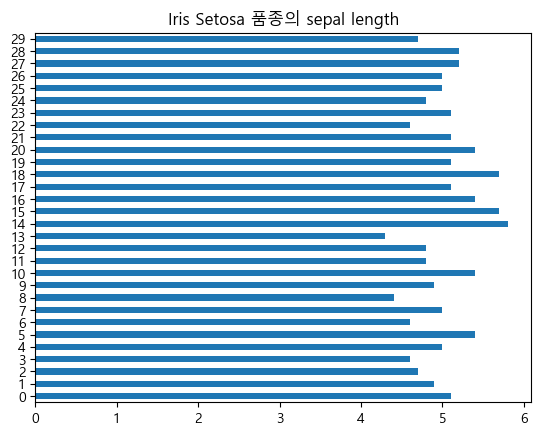

In [6]:
iris.sepal_length[:30].plot(kind='barh')  # rot : 봉봉스타일
plt.title("Iris Setosa 품종의 sepal length");

그룹분석으로 각 붓꽃종의 특징값의 평균을 구한 것이다.

In [7]:
df2 = iris.groupby(iris.species).mean()
df2

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


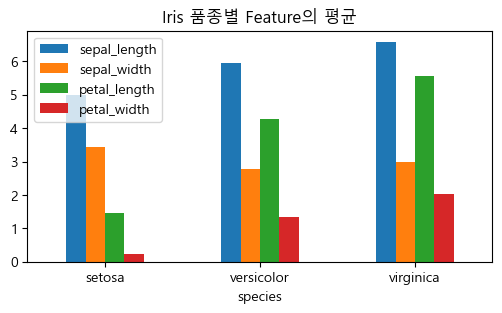

In [13]:
df2.plot.bar(rot=0, figsize=(6,3))  # df2.plot(kind='bar')
plt.title('Iris 품종별 Feature의 평균');
# 오점: legend(범례)가 bar와 겹침

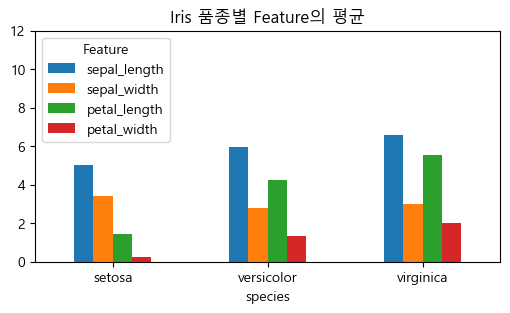

In [16]:
# 범례 이름부여/ylim세팅으로 위의 오점 해결
df2.columns.name='Feature'
df2.plot.bar(rot=0, figsize=(6,3))
plt.ylim(0,12)
plt.title('Iris 품종별 Feature의 평균');

- pie chart

In [17]:
titanic = sns.load_dataset('titanic')

s = titanic['class'].value_counts()
s

class
Third     491
First     216
Second    184
Name: count, dtype: int64

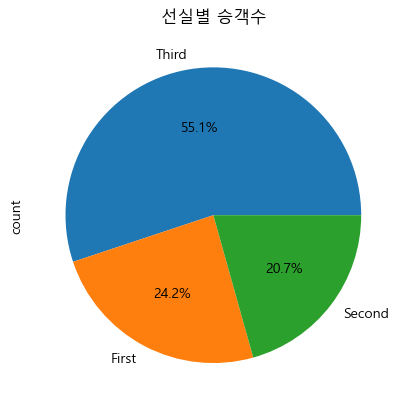

In [20]:
s.plot.pie(autopct='%.1f%%')        # autopct
plt.title('선실별 승객수');

- histogram, kernel density

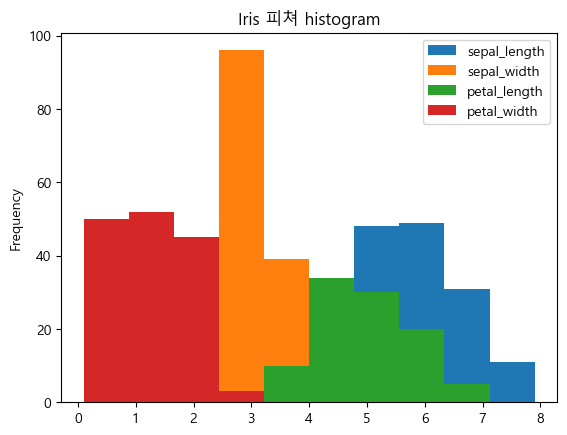

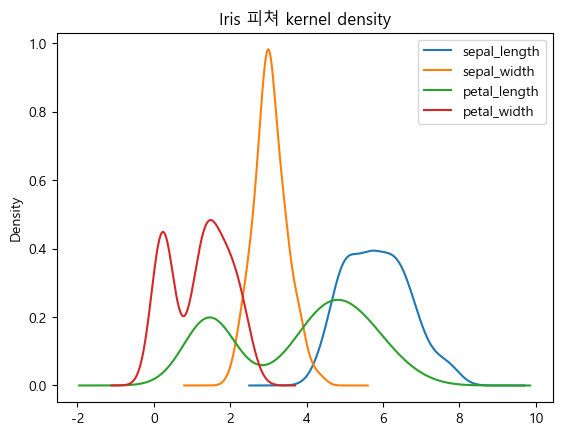

In [23]:
iris.plot.hist()                        # pip install scipy 설치하고 실행하기
plt.title('Iris 피쳐 histogram');
iris.plot.kde()
plt.title('Iris 피쳐 kernel density');
plt.show()

- boxplot

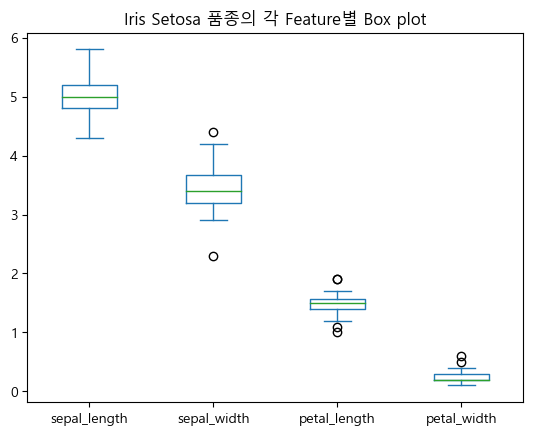

In [24]:
iris[iris.species == 'setosa'].plot.box()
plt.title('Iris Setosa 품종의 각 Feature별 Box plot');

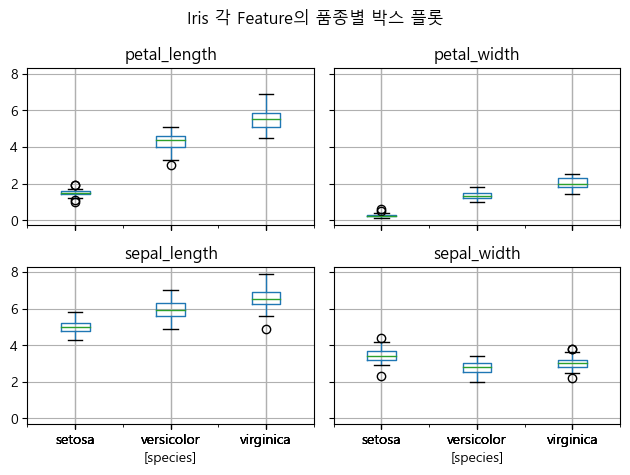

In [26]:
iris.boxplot(by='species')
plt.tight_layout()
plt.suptitle('Iris 각 Feature의 품종별 박스 플롯'); # super title